## Import Libraries

In [1]:
!pip list | grep google-cloud-bigquery

google-cloud-bigquery                    3.22.0
google-cloud-bigquery-storage            2.25.0


In [2]:
!pip install google-cloud-storage google-cloud-bigquery pandas textblob plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 771.8 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 4.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 24.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 775.1/775.1 kB 57.0 MB/s eta 0:00:00


## Instantiate Service Access to BigQuery Client

In [3]:
from google.cloud import bigquery

key_path = 'customer-reviews-27821-ce7f459d0a0a.json'

client = bigquery.Client.from_service_account_json(key_path)

## Import Dataset from Big

In [4]:
query = """ 
SELECT * 
FROM `customer-reviews-27821.reviews_by_customers.reviews_table`
WHERE RAND() < (1150000 / (SELECT COUNT(*) FROM `customer-reviews-27821.reviews_by_customers.reviews_table`))
"""

query_data = client.query(query)

df = query_data.to_dataframe()

df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,52529112,R19O08234WZ3M0,B00425S1H8,386765193,Plugable USB to RS-232 DB9 Serial Adapter (Pro...,PC,3,0,1,False,True,Worked but required an additional adapter,The adapter came with female threaded nuts tha...,2013-01-09
1,US,43856501,R2NOPGMUC39HO,B006GWO5NE,564071965,Amazon 5ft USB to Micro-USB Cable (works with ...,PC,1,0,0,False,False,problem with kindle,This did not solve my kindle problem and i don...,2013-08-19
2,US,33278723,R2MW15DTHRRMSB,B008HK3XKO,893861753,Marware Vibe Standing Case for Kindle Fire HD ...,PC,5,0,0,False,True,kindle cover,Fit the kindle fire hd perfectly. The black wa...,2013-01-28
3,US,21951802,R3KOC1O75FRIUS,B008RXYOKY,766086893,Apple Thunderbolt to FireWire Adapter,PC,5,0,0,False,True,Would recommend to a friend.,Fits my needs. Happy with my purchase. Well c...,2014-03-05
4,US,43248065,R3EXUH0288SPU6,B0095VP8D4,792792668,AMD A10-5800K APU 3.8Ghz Processor AD580KWOHJBOX,PC,5,1,2,False,True,Nice Product,I love this processor. It's so fast and quite ...,2013-03-24


In [5]:
print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns")

Dataset has 3250246 rows and 15 columns


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3250246 entries, 0 to 3250245
Data columns (total 15 columns):
 #   Column             Dtype  
---  ------             -----  
 0   marketplace        object 
 1   customer_id        Int64  
 2   review_id          object 
 3   product_id         object 
 4   product_parent     Int64  
 5   product_title      object 
 6   product_category   object 
 7   star_rating        Int64  
 8   helpful_votes      Int64  
 9   total_votes        Int64  
 10  vine               boolean
 11  verified_purchase  boolean
 12  review_headline    object 
 13  review_body        object 
 14  review_date        dbdate 
dtypes: Int64(5), boolean(2), dbdate(1), object(7)
memory usage: 350.3+ MB


In [7]:
df.isnull().sum()

marketplace           0
customer_id           0
review_id             0
product_id            0
product_parent        0
product_title         0
product_category      0
star_rating           0
helpful_votes         0
total_votes           0
vine                  0
verified_purchase     0
review_headline      40
review_body          29
review_date           0
dtype: int64

In [8]:
df.dropna(subset=['review_headline','review_body'])

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,28184012,R3T0JMIE2WOW53,B00687PWQG,661839716,John Adams Season 1,Digital_Video_Download,5,0,0,False,True,AN ABSOLUTE MUST SEE!,This entire series is exquisite! It is extreme...,2014-12-06
1,US,46377182,R1DSO3VMV63MSY,B009NPKTN6,877921727,Rock of Ages (2012),Digital_Video_Download,4,0,0,False,True,Good but not great,I was lucky enough to see this show on Broadwa...,2013-01-13
2,US,47659188,R3IOQVWIU1JCM2,B00BF11STU,203465797,Zero Dark Thirty,Digital_Video_Download,2,0,1,False,True,it was ok,i was quite bored. the only part that was inte...,2013-04-14
3,US,47503411,R21A120094I1JE,B00GX59QO2,645382359,Red 2,Digital_Video_Download,5,0,1,False,True,"At least as good as the original. Funnt, fast ...","This was a great movie, thr interaction of cha...",2013-12-14
4,US,1700003,R373ARADQ1OMI,B00HY7YXIM,592331046,"The White Queen, Season 1",Digital_Video_Download,2,0,0,False,True,"The tudors holds your attention way better, ac...","Overly dramatic, people shouting all the time....",2015-03-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3250241,US,1430874,R1G86DIFDQA88W,B0047HYMHE,520198341,Test Asin: A Dance with Governator 2,Books,5,1,1,False,False,This is a test review,Please do not suppress my review. It is just f...,2014-06-17
3250242,US,44600026,R279NY81DJTZLN,B000000OQF,485103504,Appetite For Destruction,Music,5,0,0,False,False,THIS CD IS HOTT!,This CD is quality stuff. Guns N' Roses as a h...,2001-03-28
3250243,US,51086982,R1SNPD3SIN2RH4,B000000XCK,616654004,Pendulum,Music,5,1,1,False,False,Great CCR,This album will help you to remember* the sixt...,2015-08-03
3250244,US,13606832,R1OFQXH4K6A52C,B000002KCC,468801826,Tonight's the Night,Music,1,1,12,False,False,Wasted on the way,I wasn't impressed with this wasted effort sh...,2014-09-07


### Data Exploration

In [9]:
df['product_title'].value_counts()

product_title
Candy Crush Saga                                                                                          23431
The Secret Society® - Hidden Mystery                                                                      19524
Google Chromecast HDMI Streaming Media Player                                                             17020
The Fault in Our Stars                                                                                    16898
Minecraft                                                                                                 16335
                                                                                                          ...  
Laundry Service (+ Bonus Avcd)                                                                                1
Seiko SKX007K Automatic 200m Diver Rubber Band Men's Watch                                                    1
Voyager Outlander 03                                                                      

In [10]:
df['product_category'].value_counts()

product_category
Mobile_Apps                 690062
Digital_Ebook_Purchase      585378
Video DVD                   514603
Digital_Video_Download      496675
Books                       393728
Music                       365240
Digital_Music_Purchase       50837
Toys                         27449
PC                           26713
Video                        21736
Home Entertainment           17288
Wireless                     10687
Camera                        7964
Video Games                   7223
Electronics                   5376
Musical Instruments           5079
Watches                       4927
Tools                         3496
Shoes                         3487
Baby                          2792
Sports                        1935
Home Improvement              1751
Outdoors                      1468
Office Products               1080
Home                           939
Kitchen                        882
Lawn and Garden                569
Health & Personal Care         505
Aut

### Star Rating

In [11]:
df.star_rating.value_counts()

star_rating
5    2083072
4     593908
3     251457
1     190183
2     131626
Name: count, dtype: Int64

### Helpful Votes

In [12]:
df.helpful_votes.value_counts()

helpful_votes
0       2254854
1        458081
2        169673
3         93267
4         57924
         ...   
909           1
915           1
494           1
1708          1
2968          1
Name: count, Length: 1150, dtype: Int64

### Total Votes

In [13]:
df.total_votes.value_counts()

total_votes
0       1833671
1        572370
2        247623
3        135490
4         88411
         ...   
947           1
728           1
1539          1
1605          1
1047          1
Name: count, Length: 1273, dtype: Int64

### Verified Purchases

In [14]:
df.verified_purchase.value_counts()

verified_purchase
True     2372151
False     878095
Name: count, dtype: Int64

### Reviews Headline

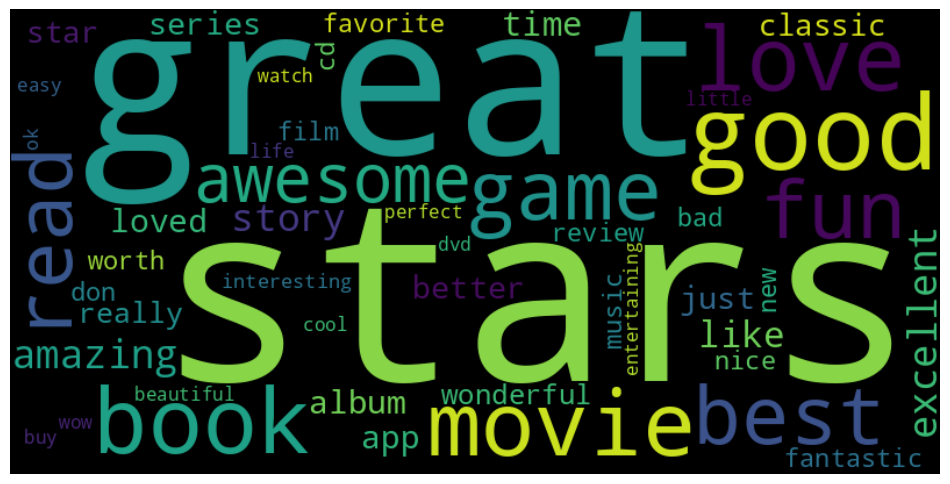

In [15]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

# Function to get most common words
def get_most_common_words(text_series, n=50):
    vectorizer = CountVectorizer(stop_words='english')
    word_count = vectorizer.fit_transform(text_series.dropna())
    sum_words = word_count.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words_headline = get_most_common_words(df['review_headline'])

def plot_word_cloud(common_words):
    wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(dict(common_words))
    plt.figure(figsize=(12, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

plot_word_cloud(common_words_headline)

In [16]:
plt.savefig('wordcloud_headline .png')

common_words_headline

[('stars', 460189),
 ('great', 323640),
 ('good', 187142),
 ('book', 139131),
 ('movie', 134191),
 ('love', 132078),
 ('game', 111222),
 ('best', 108725),
 ('fun', 107655),
 ('read', 105354),
 ('awesome', 83833),
 ('amazing', 51296),
 ('excellent', 51179),
 ('story', 49628),
 ('like', 44410),
 ('time', 39808),
 ('loved', 37425),
 ('album', 37166),
 ('app', 36643),
 ('better', 35077),
 ('just', 33891),
 ('series', 32758),
 ('classic', 31312),
 ('star', 30403),
 ('really', 28875),
 ('wonderful', 26347),
 ('nice', 21814),
 ('worth', 21335),
 ('bad', 20831),
 ('favorite', 20779),
 ('film', 20557),
 ('don', 20409),
 ('cd', 20325),
 ('fantastic', 20117),
 ('review', 20089),
 ('new', 19908),
 ('music', 19755),
 ('interesting', 19170),
 ('ok', 17424),
 ('beautiful', 16820),
 ('perfect', 16616),
 ('watch', 16385),
 ('entertaining', 15773),
 ('wow', 15731),
 ('cool', 15420),
 ('life', 15267),
 ('dvd', 15253),
 ('easy', 14818),
 ('buy', 14651),
 ('little', 14567)]

<Figure size 640x480 with 0 Axes>

### Reviews Body

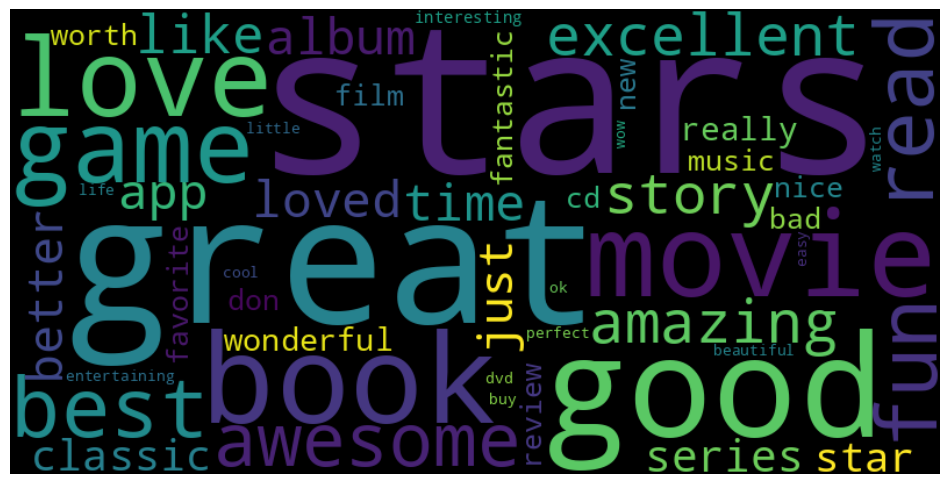

In [17]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

# Function to get most common words
def get_most_common_words(text_series, n=50):
    vectorizer = CountVectorizer(stop_words='english')
    word_count = vectorizer.fit_transform(text_series.dropna())
    sum_words = word_count.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words_body = get_most_common_words(df['review_headline'])

def plot_word_cloud(common_words):
    wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(dict(common_words))
    plt.figure(figsize=(12, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

plot_word_cloud(common_words_headline)

In [18]:
plt.savefig('wordcloud_headline .png')

common_words_body

[('stars', 460189),
 ('great', 323640),
 ('good', 187142),
 ('book', 139131),
 ('movie', 134191),
 ('love', 132078),
 ('game', 111222),
 ('best', 108725),
 ('fun', 107655),
 ('read', 105354),
 ('awesome', 83833),
 ('amazing', 51296),
 ('excellent', 51179),
 ('story', 49628),
 ('like', 44410),
 ('time', 39808),
 ('loved', 37425),
 ('album', 37166),
 ('app', 36643),
 ('better', 35077),
 ('just', 33891),
 ('series', 32758),
 ('classic', 31312),
 ('star', 30403),
 ('really', 28875),
 ('wonderful', 26347),
 ('nice', 21814),
 ('worth', 21335),
 ('bad', 20831),
 ('favorite', 20779),
 ('film', 20557),
 ('don', 20409),
 ('cd', 20325),
 ('fantastic', 20117),
 ('review', 20089),
 ('new', 19908),
 ('music', 19755),
 ('interesting', 19170),
 ('ok', 17424),
 ('beautiful', 16820),
 ('perfect', 16616),
 ('watch', 16385),
 ('entertaining', 15773),
 ('wow', 15731),
 ('cool', 15420),
 ('life', 15267),
 ('dvd', 15253),
 ('easy', 14818),
 ('buy', 14651),
 ('little', 14567)]

<Figure size 640x480 with 0 Axes>

### Sentiment Analysis

In [14]:
import pandas as pd
import numpy as np
from multiprocessing import Pool, cpu_count
from textblob import TextBlob

# Define a function to analyze sentiment using TextBlob
def analyze_sentiment(text):
    if text is not None:
        blob = TextBlob(text)
        return blob.sentiment.polarity
    else:
        return None

# Define a function to map sentiment score to category
def map_sentiment_category(score):
    if score is None:
        return 'Neutral'
    elif score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Function to apply sentiment analysis to a chunk of data
def process_chunk(chunk):
    chunk['sentiment_score'] = chunk['review_body'].apply(analyze_sentiment)
    chunk['sentiment_category'] = chunk['sentiment_score'].apply(map_sentiment_category)
    return chunk

# Function to parallelize the sentiment analysis
def parallelize_dataframe(df, func, num_partitions):
    df_split = np.array_split(df, num_partitions)
    pool = Pool(cpu_count())
    df = pd.concat(pool.map(func, df_split))
    pool.close()
    pool.join()
    return df

# Number of partitions for parallel processing
num_partitions = cpu_count() * 2

# Apply the sentiment analysis in parallel
df_result = parallelize_dataframe(df, process_chunk, num_partitions)

print(df_result.head())

  marketplace  customer_id       review_id  product_id  product_parent  \
0          US     52529112  R19O08234WZ3M0  B00425S1H8       386765193   
1          US     43856501   R2NOPGMUC39HO  B006GWO5NE       564071965   
2          US     33278723  R2MW15DTHRRMSB  B008HK3XKO       893861753   
3          US     21951802  R3KOC1O75FRIUS  B008RXYOKY       766086893   
4          US     43248065  R3EXUH0288SPU6  B0095VP8D4       792792668   

                                       product_title product_category  \
0  Plugable USB to RS-232 DB9 Serial Adapter (Pro...               PC   
1  Amazon 5ft USB to Micro-USB Cable (works with ...               PC   
2  Marware Vibe Standing Case for Kindle Fire HD ...               PC   
3              Apple Thunderbolt to FireWire Adapter               PC   
4   AMD A10-5800K APU 3.8Ghz Processor AD580KWOHJBOX               PC   

   star_rating  helpful_votes  total_votes   vine  verified_purchase  \
0            3              0            1  

In [22]:
df = df_result.copy()

In [34]:
df.sentiment_category.value_counts()

sentiment_category
Positive    976212
Negative    122304
Neutral      51678
Name: count, dtype: int64

## Review Date

In [16]:
# Convert review_date to datetime format and extract the year
df['review_date'] = pd.to_datetime(df['review_date'], errors='coerce')
df['review_year'] = df['review_date'].dt.year

## Visulisation

In [15]:
!pip install kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 13.4 MB/s eta 0:00:0000:0100:01


### Sentiment Distribution by Product Category

In [ ]:
import plotly.graph_objs as go
import plotly.express as px
import kaleido

# Get the top 10 product categories
top_categories = df['product_category'].value_counts().nlargest(10).index

# Filter DataFrame to include only the top 10 product categories
df_top_categories = df[df['product_category'].isin(top_categories)]

# Plot Sentiment Category vs Product Category for top 10 categories
fig_product_category = px.histogram(df_top_categories, x='product_category', color='sentiment_category', barmode='group',
                                    title='Sentiment Category vs Top 10 Product Categories',
                                    text_auto=True, # Add text value
                                    width=1200,
                                    height=800)

fig_product_category.write_image('sentiment_category_vs_product_category.png')
fig_product_category.show()

## Sentiment Category vs Verified Purchases

In [ ]:
fig_verified_purchases = px.histogram(df, x='verified_purchase', color='sentiment_category', barmode='group',
                                      title='Sentiment Category vs Verified Purchases',
                                      text_auto=True, # Add text value
                                      width=800,
                                      height=600)

fig_verified_purchases.write_image('sentiment_category_vs_verified_purchases.png')
fig_verified_purchases.show()

## Sentiment Category vs Total Votes

In [ ]:
fig_total_votes = px.histogram(df, x='total_votes', color='sentiment_category', barmode='group',
                               title='Sentiment Category vs Total Votes',
                               text_auto=True, # Add text value
                               width=800,
                               height=600)

fig_total_votes.write_image('sentiment_category_vs_total_votes.png')
fig_total_votes.show()

# Sentiment Category vs Review Year

In [ ]:
fig_review_year = px.histogram(df, x='review_year', color='sentiment_category', barmode='group',
                               title='Sentiment Category vs Review Year',
                               text_auto=True, # Add text value
                               width=800,
                               height=600)

fig_review_year.write_image('sentiment_category_vs_review_year.png')
fig_review_year.show()

## Sentiment Category vs Helpful Votes

In [ ]:
fig_helpful_votes = px.histogram(df, x='helpful_votes', color='sentiment_category', barmode='group',
                                 title='Sentiment Category vs Helpful Votes',
                                 text_auto=True, # Add text value
                                 width=800,
                                 height=600)

fig_helpful_votes.write_image('sentiment_category_vs_helpful_votes.png')
fig_helpful_votes.show()

## # Sentiment Category vs Star Rating

In [ ]:
fig_star_rating = px.histogram(df, x='star_rating', color='sentiment_category', barmode='group',
                               title='Sentiment Category vs Star Rating',
                               text_auto=True, # Add text value
                               width=800,
                               height=600)

fig_star_rating.write_image('sentiment_category_vs_star_rating.png')
fig_star_rating.show()

## Save to Cloud Storage

In [ ]:
# Save the result to a CSV file
df_result.to_csv('sentiment_analysis_results.csv', index=False)

# Save to Google Cloud Storage
storage_client = storage.Client()
bucket_name = 'store-customer-data'
bucket = storage_client.bucket(bucket_name)
blob = bucket.blob('sentiment_analysis_results.csv')
blob.upload_from_filename('sentiment_analysis_results.csv')